In [9]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
file_path = "loan_data.xls"

In [11]:
# Load the dataset as a CSV file

loan_data = pd.read_csv(file_path)



# Display basic information about the dataset and the distribution of the target variable

loan_data_info = loan_data.info()

target_distribution = loan_data['not.fully.paid'].value_counts(normalize=True)



loan_data_info, target_distribution

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


(None,
 not.fully.paid
 0    0.839946
 1    0.160054
 Name: proportion, dtype: float64)

Text(0, 0.5, 'Count')

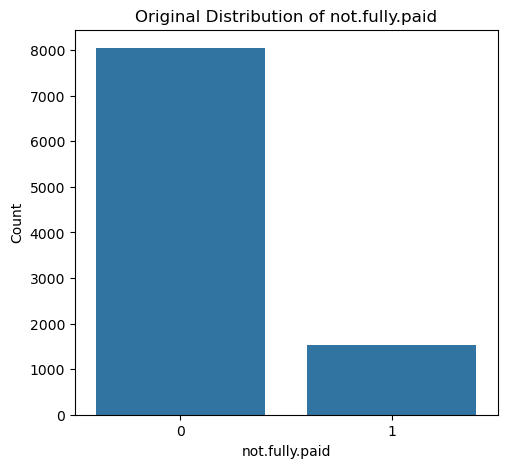

In [14]:
X = loan_data.drop('not.fully.paid', axis=1)
y = loan_data['not.fully.paid']

# Convert categorical features to numerical using one-hot encoding
X_encoded = pd.get_dummies(X, drop_first=True)

# Plot the original distribution of the target variable
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.countplot(x=y)
plt.title('Original Distribution of not.fully.paid')
plt.xlabel('not.fully.paid')
plt.ylabel('Count')

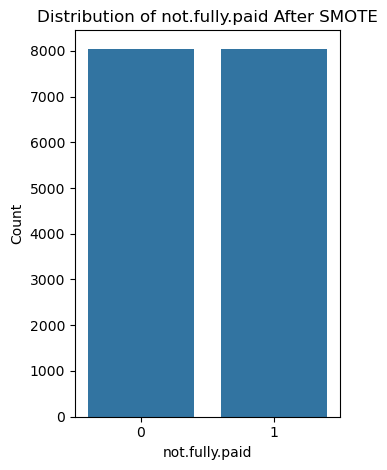

In [15]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_encoded, y)

# Plot the distribution of the target variable after oversampling
plt.subplot(1, 2, 2)
sns.countplot(x=y_resampled)
plt.title('Distribution of not.fully.paid After SMOTE')
plt.xlabel('not.fully.paid')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [16]:
balanced_data = pd.concat([pd.DataFrame(X_resampled, columns=X_encoded.columns), pd.Series(y_resampled, name='not.fully.paid')], axis=1)

# Save the balanced dataset to a CSV file
balanced_data.to_csv('balanced_loan_data.csv', index=False)